In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [41]:
train=pd.read_csv("train.csv")
df1=pd.DataFrame(train)
test=pd.read_csv("test.csv")
df2=pd.DataFrame(test)

In [48]:
df2.rename(columns={'Personality (class label)': 'Personality'}, inplace=True)

In [49]:
df1.rename(columns={'Personality (Class label)': 'Personality'}, inplace=True)

In [50]:
df=pd.concat([df1,df2])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [51]:
df.shape

(1024, 8)

In [52]:
df.Gender.unique()

array(['Male', 'Female', '5'], dtype=object)

In [53]:
from sklearn.impute import SimpleImputer

imputeC = SimpleImputer(missing_values="5", strategy="most_frequent")

imputed_gender_data = imputeC.fit_transform(df[['Gender']])

imputed_gender_data = imputed_gender_data.reshape(-1)

df['Gender'] = imputed_gender_data


In [54]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [55]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0,17,7,4,7,3,2,extraverted
1,0,19,4,5,4,6,6,serious
2,1,18,7,6,4,5,5,dependable
3,1,22,5,6,7,4,3,extraverted
4,1,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3,extraverted
311,0,18,2,5,8,3,7,dependable
312,0,18,7,5,6,2,7,serious
313,0,23,6,7,5,4,3,extraverted


In [56]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [57]:
df['Personality'] = df['Personality'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0,17,7,4,7,3,2,1
1,0,19,4,5,4,6,6,4
2,1,18,7,6,4,5,5,0
3,1,22,5,6,7,4,3,1
4,1,19,7,4,6,5,4,2
...,...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3,1
311,0,18,2,5,8,3,7,0
312,0,18,7,5,6,2,7,4
313,0,23,6,7,5,4,3,1


In [58]:
df['Personality'].value_counts()

Personality
4    314
1    227
3    166
0    159
2    158
Name: count, dtype: int64

In [59]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [60]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0,17,7,4,7,3,2,1
1,0,19,4,5,4,6,6,4
2,1,18,7,6,4,5,5,0
3,1,22,5,6,7,4,3,1
4,1,19,7,4,6,5,4,2
...,...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3,1
311,0,18,2,5,8,3,7,0
312,0,18,7,5,6,2,7,4
313,0,23,6,7,5,4,3,1


In [61]:
from imblearn.over_sampling import RandomOverSampler

# Separate the features and the target
X = df.drop('Personality', axis=1)
y = df['Personality']

# Define the target number of samples for each class
sampling_strategy = {0: 500, 1: 500, 2: 500, 3: 500, 4: 500}

# Initialize the oversampler with the specific strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Perform the oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Personality'])], axis=1)

print(df_resampled['Personality'].value_counts())


Personality
1    500
4    500
0    500
2    500
3    500
Name: count, dtype: int64


In [97]:
df_resampled.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0,17,7,4,7,3,2,1
1,0,19,4,5,4,6,6,4
2,1,18,7,6,4,5,5,0
3,1,22,5,6,7,4,3,1
4,1,19,7,4,6,5,4,2


In [98]:
df_resampled.isna().sum()

Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

In [99]:
df = df_resampled.copy()

In [100]:
df.shape

(2500, 8)

In [102]:
df.isna().sum()

Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

In [103]:
df.dtypes

Gender               int64
Age                  int64
openness             int64
neuroticism          int64
conscientiousness    int64
agreeableness        int64
extraversion         int64
Personality          int64
dtype: object

In [101]:
df.skew()

Gender              -0.092956
Age                  0.336196
openness            -0.656037
neuroticism         -0.416219
conscientiousness   -0.374120
agreeableness       -0.548516
extraversion        -0.332331
Personality          0.000000
dtype: float64

In [104]:
df.groupby(by=['Personality', 'Age']).mean()

Gender  openness  neuroticism  conscientiousness  \
Personality Age                                                       
0           17   0.606061  5.454545     5.333333           4.727273   
            18   0.629310  5.146552     4.724138           4.750000   
            19   0.522876  4.784314     4.653595           4.673203   
            20   0.592593  5.240741     4.629630           5.759259   
            21   0.605263  5.184211     4.657895           4.868421   
...                   ...       ...          ...                ...   
4           24   0.380952  4.904762     4.476190           5.095238   
            25   0.636364  5.272727     3.818182           5.272727   
            26   0.285714  4.142857     4.714286           4.571429   
            27   0.000000  4.750000     5.000000           5.250000   
            28   0.000000  2.500000     6.000000           6.000000   

                 agreeableness  extraversion  
Personality Age                               
0           17        5.212121      4.242424  
            18        4.715517      4.939655  
            19        4.490196      4.444444  
            20        4.425926      4.814815  
            21        4.526316      4.289474  
...                        ...           ...  
4           24        3.857143      5.666667  
            25        4.636364      5.181818  
            26        5.285714      4.857143  
            27        6.250000      5.000000  
            28        2.000000      5.000000  

[61 rows x 6 columns]

<Axes: >

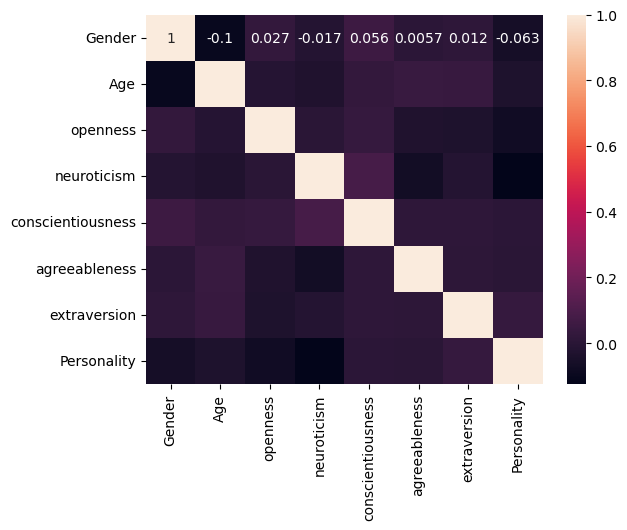

In [105]:
sns.heatmap(df.corr(), annot=True)

In [106]:
df.skew()

Gender              -0.092956
Age                  0.336196
openness            -0.656037
neuroticism         -0.416219
conscientiousness   -0.374120
agreeableness       -0.548516
extraversion        -0.332331
Personality          0.000000
dtype: float64

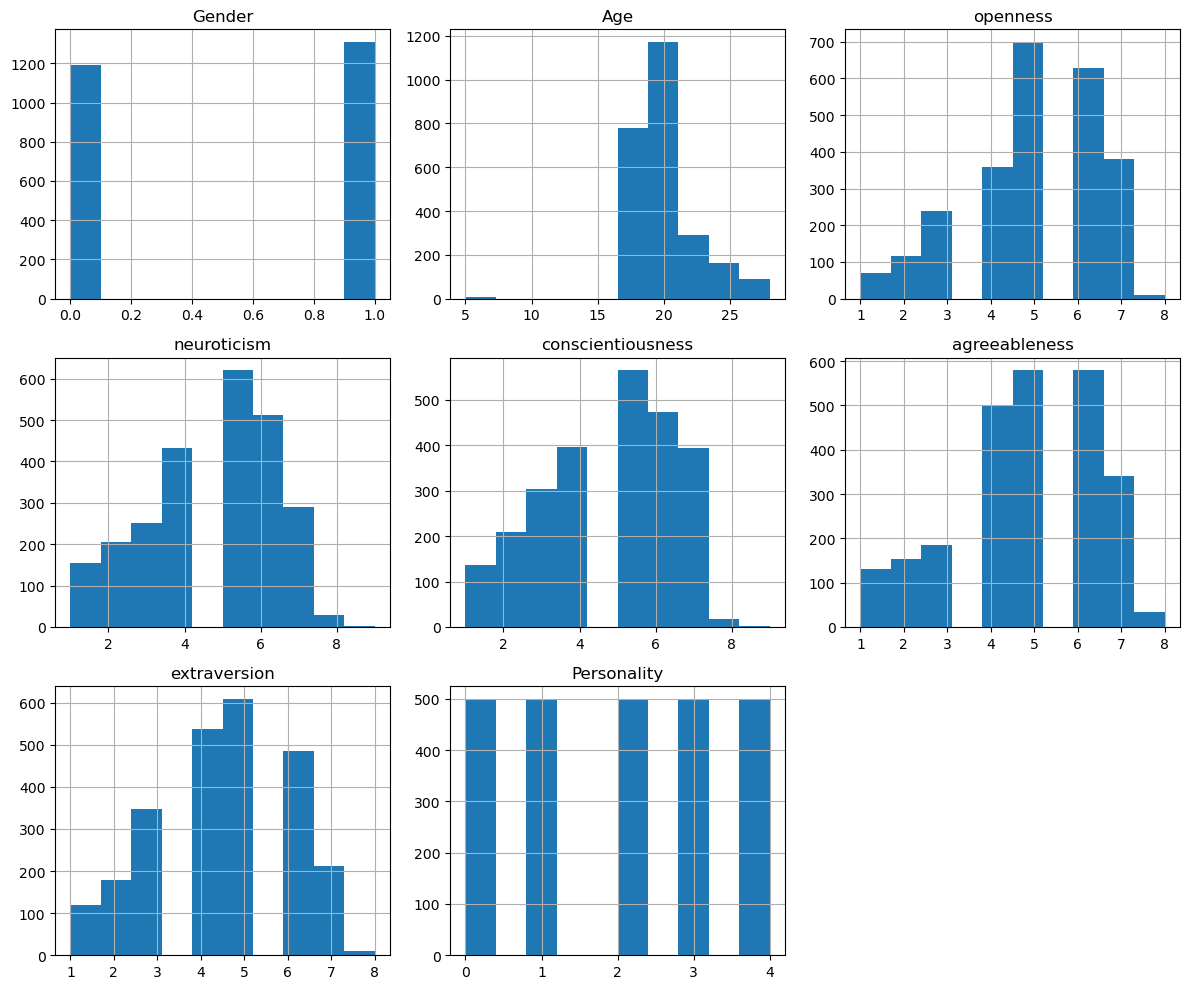

In [107]:
df.hist(figsize=(12, 10))
plt.tight_layout() 
plt.show()

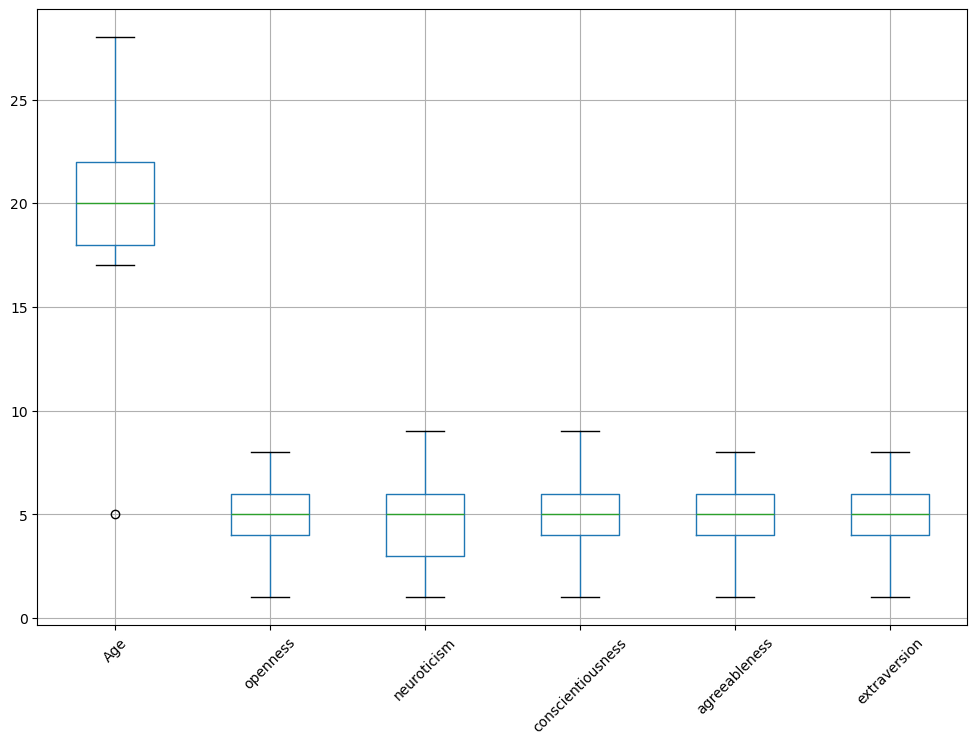

In [108]:
df2.boxplot(figsize=(12, 8))
plt.xticks(rotation=45) 
plt.show()

(array([   0.,    0.,    0.,    0.,    0., 2500.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

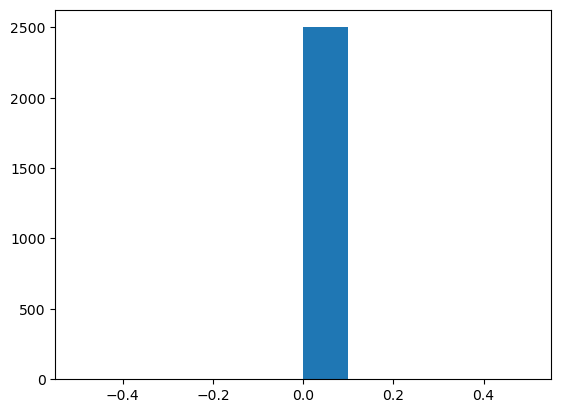

In [109]:
x = np.reciprocal(df['Age'])
plt.hist(x)

(array([   9.,    0.,    0.,    0.,    0.,    0., 1461.,  488.,  358.,
         184.]),
 array([2.23606798, 2.54161144, 2.84715491, 3.15269837, 3.45824184,
        3.7637853 , 4.06932876, 4.37487223, 4.68041569, 4.98595916,
        5.29150262]),
 <BarContainer object of 10 artists>)

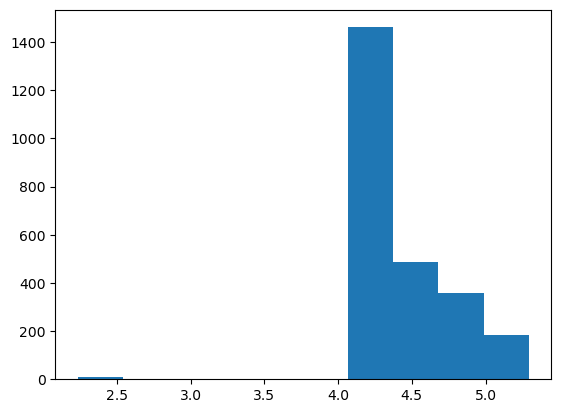

In [110]:
x = np.sqrt(df['Age'])
plt.hist(x)

(array([   9.,    0.,    0.,    0.,    0.,    0.,  778., 1171.,  358.,
         184.]),
 array([1.70997595, 1.84263725, 1.97529855, 2.10795985, 2.24062116,
        2.37328246, 2.50594376, 2.63860506, 2.77126637, 2.90392767,
        3.03658897]),
 <BarContainer object of 10 artists>)

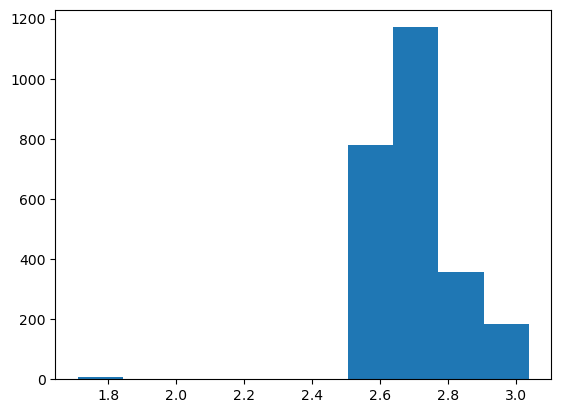

In [111]:
x = np.cbrt(df['Age'])
plt.hist(x)

(array([   9.,    0.,    0.,    0.,    0.,    0.,    0., 1461.,  777.,
         253.]),
 array([1.60943791, 1.78171457, 1.95399123, 2.12626789, 2.29854455,
        2.47082121, 2.64309787, 2.81537453, 2.98765119, 3.15992785,
        3.33220451]),
 <BarContainer object of 10 artists>)

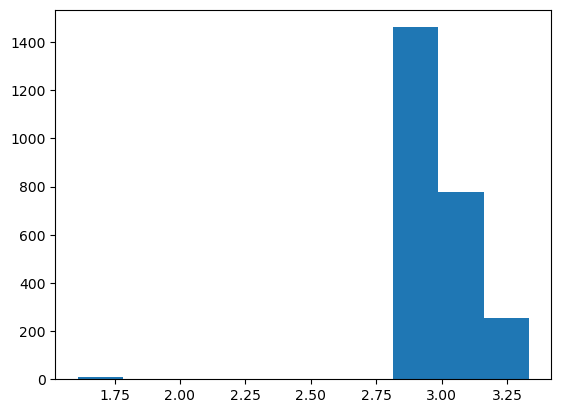

In [112]:
x = np.log(df['Age'])
plt.hist(x)

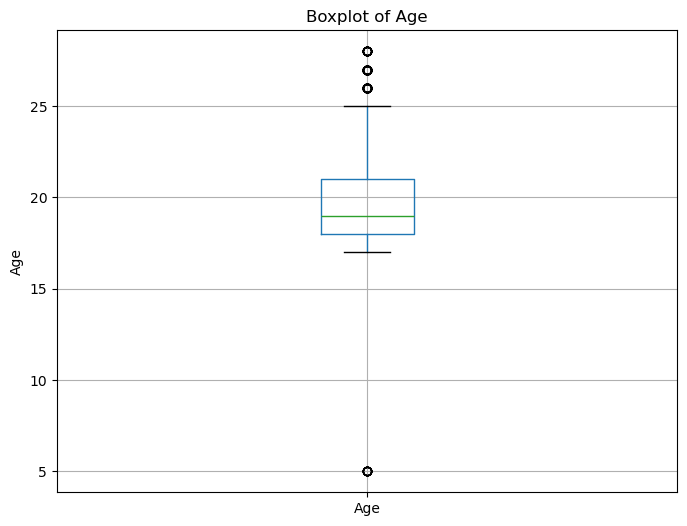

In [113]:
df.boxplot(column='Age', figsize=(8, 6))
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [114]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr= q3-q1

In [115]:
upper = q3+ (iqr*1.5)
lower = q1- (iqr*1.5)

print(lower)
print(upper)
print(iqr)

13.5
25.5
3.0


In [116]:
dff = df[(df.Age > lower) & (df.Age < upper)]

In [117]:
dff.shape

(2402, 8)

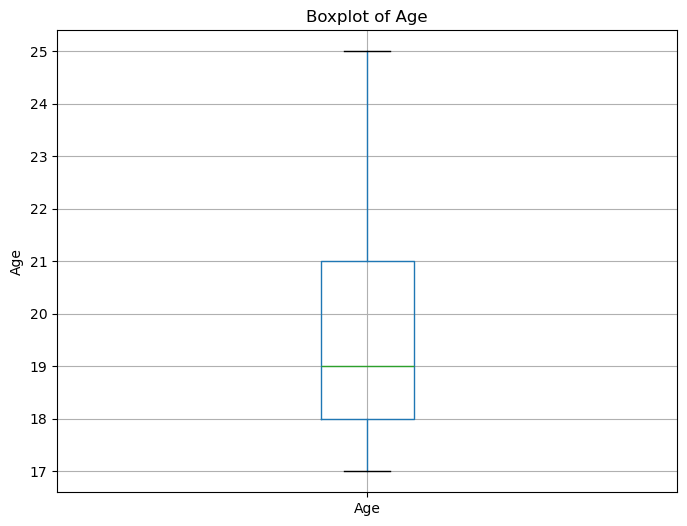

In [118]:
dff.boxplot(column='Age', figsize=(8, 6))
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [122]:
d_df=df.drop(['Personality'], axis=1)
d_df["target"]= df['Personality']
label = d_df.target.unique()

a=df[d_df.target==label[0]]
b=df[d_df.target==label[1]]
c=df[d_df.target==label[2]]
d=df[d_df.target==label[3]]
e=df[d_df.target==label[4]]

label

array([1, 4, 0, 2, 3], dtype=int64)

In [123]:
q1=df.groupby(['Personality'],sort=[label]).quantile(0.25)
q3=df.groupby(['Personality'],sort=[label]).quantile(0.75)
iqr= q3-q1

In [124]:
upper = q3+ (iqr*1.5)
lower = q1- (iqr*1.5)

print(pd.DataFrame(lower))
print(pd.DataFrame(upper))

             Gender   Age  openness  neuroticism  conscientiousness  \
Personality                                                           
0              -1.5  13.5       1.0         -1.5                1.0   
1              -1.5  12.0       1.0          1.0               -1.5   
2              -1.5  13.5       3.5         -1.5                1.0   
3              -1.5  13.5       1.0         -1.5               -1.5   
4              -1.5  13.5       1.0         -1.5                1.0   

             agreeableness  extraversion  
Personality                               
0                      1.0           1.0  
1                      1.0          -1.5  
2                      1.0           0.0  
3                      2.5           0.0  
4                      1.0           1.0  
             Gender   Age  openness  neuroticism  conscientiousness  \
Personality                                                           
0               2.5  25.5       9.0         10.5           

In [132]:
a = a[(a.openness < 9)&(a.openness > 1)] 
b = b[(b.openness < 9)&(b.openness > 1)] 
c = c[(c.openness < 7.5)&(c.openness > 3.5)] 
d = d[(d.openness < 9)&(d.openness > 1)] 
e = e[(e.openness < 9)&(e.openness > 1)] 

In [133]:
a = a[(a.neuroticism < 10.5)&(a.neuroticism > -1.5)]
b = b[(b.neuroticism < 9)&(b.neuroticism > 1)]
c = c[(c.neuroticism < 10.5)&(c.neuroticism > -1.5)]
d = d[(d.neuroticism < 10.5)&(d.neuroticism > -1.5)]
e = e[(e.neuroticism < 10.5)&(e.neuroticism > -1.5)]

In [134]:
a = a[(a.conscientiousness < 9)&(a.conscientiousness > 1)]
b = b[(b.conscientiousness < 10.5)&(b.conscientiousness > -1.5)]
c = c[(c.conscientiousness < 9)&(c.conscientiousness > 1)]
d = d[(d.conscientiousness < 10.5)&(d.conscientiousness > -1.5)]
e = e[(e.conscientiousness < 9)&(e.conscientiousness > 1)]

In [135]:
a = a[(a.agreeableness < 9)&(a.agreeableness > 1)] 
b = b[(b.agreeableness < 9)&(b.agreeableness > 1)] 
c = c[(c.agreeableness < 9)&(c.agreeableness > 1)] 
d = d[(d.agreeableness < 6.5)&(d.agreeableness > 2.5)] 
e = e[(e.agreeableness < 9)&(e.agreeableness > 1)] 

In [136]:
a = a[(a.extraversion < 9)&(a.extraversion > 1)]
b = b[(b.extraversion < 10.5)&(b.extraversion > -1.5)]
c = c[(c.extraversion < 8)&(c.extraversion > 0)]
d = d[(d.extraversion < 8)&(d.extraversion > 0)]
e = e[(e.extraversion < 9)&(e.extraversion > 1)]

In [137]:
df= pd.concat([a,b,c,d,e], axis= 0)
df.shape

(2036, 8)

In [138]:
df['openness'] = np.sqrt(max(df['openness']+1) - df['openness'])
df['agreeableness'] = np.sqrt(max(df['agreeableness']+1) - df['agreeableness'])
df.skew()

Gender              -0.076734
Age                  0.139657
openness             0.119198
neuroticism         -0.428096
conscientiousness   -0.335969
agreeableness       -0.120750
extraversion        -0.256403
Personality         -0.042929
dtype: float64

In [139]:
x=df.drop(["Personality"],axis=1)

y=df["Personality"]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.20, random_state=2,stratify=y)


In [141]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [142]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.3284313725490196
